In [81]:
def select_refim():
    #	Select good images for reference image
    #	Need *.fits files with some headers
    #		seeing : 'SEEING'
    #		depth  : 'UL5_1'
    #	Gregory S.H. Paek
    #	21.08.05
    import glob
    imkey = input('Image key (./Calib*.fits):')
    if imkey == '':
        imkey = './Calib*.fits'
    imlist = sorted(glob.glob(f'{imkey}'))

    key_seeing = 'SEEING'
    key_depth = 'UL5_2'

    #	Summary
    print('='*60)
    print(f'IMAGE KEY : {imkey}')
    print('-'*60)
    print(f'Images ({len(imlist)})')
    print('-'*60)
    print(f'Investigate Two Keys')
    print(f'SEEING\t:{key_seeing}')
    print(f'DEPTH\t:{key_depth}')
    print('-'*60)

    #	Table
    from astropy.table import Table
    outbl = Table()
    outbl['image'] = imlist
    outbl['seeing'] = 0.0
    outbl['depth'] = 0.0
    n_all = len(outbl)

    from astropy.io import fits
    #	Function
    def gethdrinfo(inim, key):
        hdr = fits.getheader(inim)
        if key in hdr.keys():
            value = hdr[key]
        else:
            value = None
        return value
    print('Now Collecting Data...')
    for i, inim in enumerate(imlist):
        outbl['seeing'][i] = gethdrinfo(inim, key_seeing)
        outbl['depth'][i] = gethdrinfo(inim, key_depth)

    #	Plot
    import matplotlib.pyplot as plt
    plt.close('all')
    plt.xlim([0, 5])
    plt.plot(outbl['seeing'], outbl['depth'], marker='o', mec='k', mfc='none', ls='none', label=f'Data ({n_all})', alpha=0.25)
    plt.xlabel('Seeing [arcsec]', fontsize=20)
    plt.ylabel('Depth [AB]', fontsize=20)
    plt.grid('both', ls='--', c='grey', alpha=0.5)
    plt.tight_layout()
    plt.minorticks_on()
    plt.show()

    #	Select cutlines
    print('-'*60)
    print('Cutlines')
    print('-'*60)
    cut_seeing = float(input('Seeing cut\t(2.5):'))
    cut_depth = float(input('Depth cut\t(19):'))
    # cut_seeing = 2.3
    # cut_depth = 18.7
    
    #	Plot Cutlines
    plt.axvline(x=cut_seeing, c='tomato', ls='-', label=f'Seeing <= {cut_seeing}')
    plt.axhline(y=cut_depth, c='tomato', ls='-', label=f'Depth >= {cut_depth}')
    plt.legend(fontsize=14, framealpha=1.0)

    #	Selected Data
    seltbl = outbl[
        (outbl['seeing'] <= cut_seeing) &
        (outbl['depth'] >= cut_depth) 
        ]
    n_sel = len(seltbl)
    print('-'*60)
    print(f'Selected Images ({n_sel})')
    print('-'*60)
    for inim in seltbl['image']: print(inim)

    #	Expected magnitude
    import numpy as np
    med_seeing = np.median(seltbl['seeing'])
    std_seeing = np.std(seltbl['seeing'])
    med_depth = np.median(seltbl['depth'])
    std_depth = np.std(seltbl['depth'])
    exp_depth = med_depth+2.5*np.log10(np.sqrt(n_sel))
    print('-'*60)
    print(f'Median Seeing\t:{round(med_seeing, 1)}')
    print(f'Median Depth\t:{round(med_depth, 1)}')
    print('')
    print(f'Expected Depth\t:{round(exp_depth, 1)}')
    #	Plot
    plt.plot(seltbl['seeing'], seltbl['depth'], marker='o', mec='tomato', mfc='none', ls='none', label=f'Filtered Data ({n_sel})', alpha=1.0)
    plt.errorbar([med_seeing], [med_depth], xerr=std_seeing, yerr=std_depth, c='k', mec='dodgerblue', mfc='none', ls='none', ms=10, capsize=5, label=f'Expected Depth : {round(exp_depth, 1)}')
    plt.legend(fontsize=14, framealpha=1.0)

    #	Save Result Plot
    import os
    outpng = f'{os.path.dirname(imkey)}/plot.png'
    print('-'*60)
    print(f'Save plot ({outpng})')
    plt.savefig(outpng, dpi=500, overwrite=True)

    #	Copy files
    path2copy = './select'
    print('-'*60)
    copy_or_not = input(f'Do you want to copy selected data to {path2copy}? (y/n):')
    if copy_or_not == 'y':
        print(f'Copy {n_sel} images to {path2copy}')
        if not os.path.isdir(path2copy):
            os.system(f'mkdir {path2copy}')
        for inim in seltbl['image']: os.system(f'cp {inim} {path2copy}')
    elif (copy_or_not == 'n') | (copy_or_not == ''):
        print('Skip copy')
    else:
        print('Wrong input and skip copy')
        print('='*60)
        print('END')

In [15]:
def cpIMG(location):
    import os
    
    #reset directory temp 
    os.chdir('/data3/yunyi/SOAO/temp')
    path = '/data3/yunyi/SOAO/temp'
    os.system('rm -r select')
    for root, directories, files in os.walk(path, topdown=False):  
        for name in files:
            extens = os.path.splitext(name)[-1]
            if extens !='.py':
                os.system(f'rm {name}')
                

    #image move            
    os.chdir(location)
    os.system('cp Cal* /data3/yunyi/SOAO/temp')
    
    os.chdir('/data3/yunyi/SOAO/temp')
    print(os.listdir())
    
    

In [20]:
def IMGsetting(name):
    import os
    
    os.chdir('/data3/yunyi/SOAO/select')
    os.system(f'mkdir {name}')
    os.chdir('/data3/yunyi/SOAO/temp/select')
    os.system(f'cp Cal* /data3/yunyi/SOAO/select/{name}')

In [84]:
cpIMG('/data6/IMSNG/IMSNGgalaxies/NGC0628/SOAO/R')

Image key (./Calib*.fits):
IMAGE KEY : ./Calib*.fits
------------------------------------------------------------
Images (145)
------------------------------------------------------------
Investigate Two Keys
SEEING	:SEEING
DEPTH	:UL5_2
------------------------------------------------------------
Now Collecting Data...


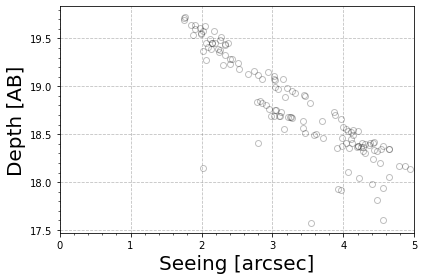

------------------------------------------------------------
Cutlines
------------------------------------------------------------
Seeing cut	(2.5):2
Depth cut	(19):19.5
------------------------------------------------------------
Selected Images (10)
------------------------------------------------------------
./Calib-SOAO-NGC0628-20191010-174319-R-60.fits
./Calib-SOAO-NGC0628-20191010-174424-R-60.fits
./Calib-SOAO-NGC0628-20191010-174529-R-60.fits
./Calib-SOAO-NGC0628-20191010-174634-R-60.fits
./Calib-SOAO-NGC0628-20191020-175426-R-60.fits
./Calib-SOAO-NGC0628-20201111-105920-R-60.fits
./Calib-SOAO-NGC0628-20201111-110235-R-60.fits
./Calib-SOAO-NGC0628-20201111-110340-R-60.fits
./Calib-SOAO-NGC0628-20201112-115818-R-60.fits
./Calib-SOAO-NGC0628-20201112-120133-R-60.fits
------------------------------------------------------------
Median Seeing	:1.9
Median Depth	:19.6

Expected Depth	:20.9
------------------------------------------------------------
Save plot (./plot.png)


<ipython-input-81-40e2cd8f2e14>:109: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(outpng, dpi=500, overwrite=True)


------------------------------------------------------------
Do you want to copy selected data to ./select? (y/n):y
Copy 10 images to ./select


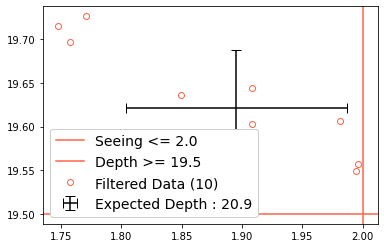

In [87]:
os.chdir('/data3/yunyi/SOAO/temp')
select_refim()

In [88]:
IMGsetting('NGC0628')